In [15]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


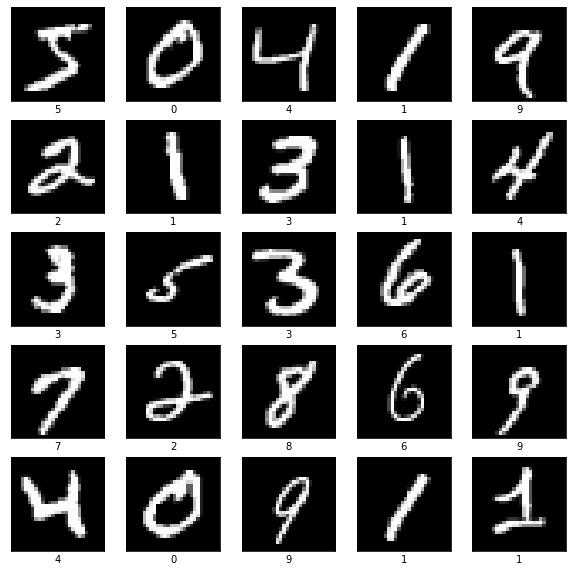

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [4]:
# hyper paramter

learning_rate = 0.001
epochs = 30
batch_size = 50

In [16]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
Dropout(0.25)

model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
Dropout(0.25)

model.add(Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu',padding='SAME'))

# pooling_3 = MaxPooling2D(pool_size=(2,2), padding='SAME')
# model.add(pooling_3)

model.add(Flatten())

# 출력층 
model.add(Dense(10, activation='softmax'))

In [17]:
# model compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

model.compile(optimizer=Adam(learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [19]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [20]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, 
                 batch_size=batch_size, epochs=epochs, 
                 validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.1311 - accuracy: 0.9600 - val_loss: 0.0412 - val_accuracy: 0.9864
Epoch 2/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.0350 - val_accuracy: 0.9883
Epoch 3/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0405 - val_accuracy: 0.9883
Epoch 4/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0255 - val_accuracy: 0.9920
Epoch 5/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0260 - val_accuracy: 0.9922
Epoch 6/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0305 - val_accuracy: 0.9901
Epoch 7/30
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0271 - val_accuracy:

In [21]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9926


[0.051612962037324905, 0.9926000237464905]

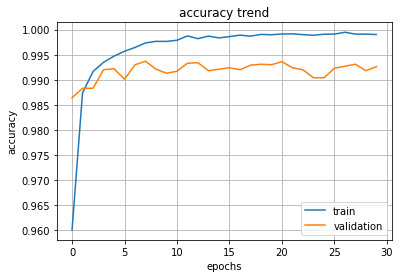

In [22]:
plt.title('accuracy trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')

plt.legend(loc='best')

plt.show()

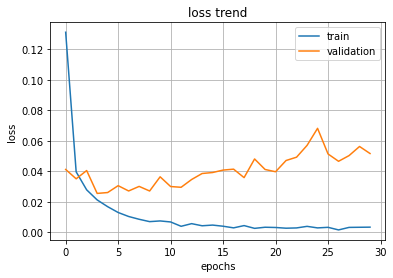

In [23]:
plt.title('loss trend')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')

plt.legend(loc='best')

plt.show()